# <center>Upstream</center>
O método simples de Euler, Equação 4.5, pode ser tornar estável substituindo a diferença de espaço para frente por uma diferença de espaço para trás, desde que a velocidade da onda c seja positiva. Se a velocidade da onda for negativa, uma diferença para frente deve ser usada para garantir a estabilidade. Esse ponto é discutido mais detalhadamente no final desta seção. Para uma velocidade de onda positiva, o seguinte algoritmo resulta:
\begin{equation}
\frac{u_{j}^{n+1} - u_{j}^{n}}{\Delta t} + c \frac{u_{j}^{n} - u_{j-1}^{n}}{\Delta x} = 0, \quad c > 0
\end{equation}
Este é um método de primeira ordem com precisão, com erros de truncamento de O[Δt, Δx]. A análise de estabilidade de von Neumann mostra que este método é estável, desde que:
\begin{equation}
0 \leq \nu \leq 1, \quad \text{onde} \quad \nu = \frac{c \Delta t}{\Delta x}
\end{equation}

# Questão 5 da lista 4. 

Resolva, numericamente, a equação da onda:

\begin{equation}
u_t + u_x = 0, \quad 0 \leq x \leq L
\end{equation}

Submetida à condição inicial:

\begin{equation}
u(x, 0) = \sin\left(\frac{2n\pi x}{L}\right)
\end{equation}

e às **condições de contorno periódicas**, utilizando os seguintes esquemas de diferenças finitas:

1. **Upstream**
2. ~~Lax~~
3. ~~Leap Frog~~
4. ~~Lax-Wendroff~~
5. ~~MacCormack~~
6. ~~Lax-Wendroff de 2 passos~~
7. ~~Upwind de 2ª Ordem~~
8. ~~Trapezoidal (Time Centered Implicit)~~
9. ~~Warming-Kutler-Lomax~~
10. ~~Rusanov ($\omega = 3$)~~
11. ~~Euler Explícito~~

Escolha uma malha com 41 pontos e $\Delta x = 1$ (logo,  $L = 40$) e calcule para  $t = 18.$ Resolva este problema para  $n = 3$ e $\nu = 1$, $\nu = 0.6$ e $\nu = 0.3$ e compare graficamente com a solução exata.


Determine $\beta$  para  $n = 3$ e calcule os erros na amplitude e na fase para o esquema com $\nu = 0.6$.
Compare estes erros com os que aparecem nos gráficos.


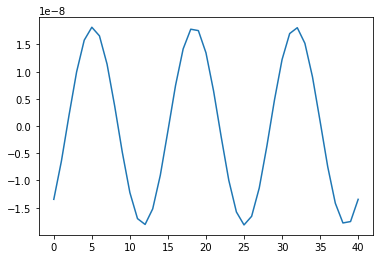

In [11]:
# método de Lax
import numpy as np
import matplotlib.pyplot as plt

# dados iniciais
l = 40
delta_x = 1
num_pontos = 41
t_final = 180
c = 1
delta_t = 0.1 
n = 3
x = np.arange(0, num_pontos, delta_x)
t = np.arange(0, t_final, delta_t)
num_tempo = len(t)


u_num = np.zeros((num_tempo, num_pontos))
u_num[0, :] = np.sin(2 * n * (np.pi * x / l))
v = (delta_t / delta_x) * c

for i in range(1, num_tempo):
    for j in range(1, num_pontos):
        u_num[i, j] = u_num[i - 1, j] - v * (u_num[i - 1, j] - u_num[i - 1, j - 1])
    u_num[i, 0] = u_num[i, num_pontos - 1]

plt.plot(u_num[-1,:]);